In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [2]:
clicked = pd.read_csv('CLICKED.csv')
unknown = pd.read_csv('UNKNOWN.csv')

In [3]:
clicked.head()

,tot_spend,age,value,customer_class
0,10852.100,41.000,5,30.000
1,4747.800,60.000,4,49.000
2,3611.750,38.000,3,186.000
3,6271.800,38.000,4,49.000
4,2879.940,44.000,3,44.000


In [4]:
unknown.head()

,Unnamed: 0,ID,age,customer_class,value,tot_spend,customer_value
0,0,28e58c5662177c2d2878e5d4226147e6,nan,30,MEDIUM,700.000,2
1,1,7cac3ea7130e6055869de91d46dcbd5b,41.000,39,HIGH,2257.300,3
2,2,e0f0511bf61bbfe6758118ab4e7d09c9,nan,30,MEDIUM,1552.600,2
3,3,8cb24192488bc7a1b03341669f0cc1d5,nan,46,VERY HIGH,5513.460,4
4,4,60f773f9b7c7402712ca2aa77bd3737b,38.000,46,HIGH,2782.270,3


In [5]:
clicked['value'].unique()

array([5, 4, 3, 2, 1])

In [6]:
unknown['value'].unique()

array(['MEDIUM', 'HIGH', 'VERY HIGH', 'LOW', 'TOP'], dtype=object)

In [7]:
clicked.describe()

,tot_spend,age,value,customer_class
count,2726.000,2726.000,2726.000,2726.000
mean,10552.840,32.698,4.087,67.476
std,10090.465,9.448,1.122,78.359
min,0.000,15.000,1.000,30.000
25%,3266.779,27.000,3.000,39.000
50%,9392.417,31.000,5.000,44.000
75%,14823.507,35.000,5.000,46.000
max,262393.110,117.000,5.000,403.000


In [8]:
# Get the means 
mean_data = clicked.describe().loc['mean', :]

# Append means to the samples' data
samples_bar = samples.append(mean_data)

# Construct indices
samples_bar.index = indices + ['mean']

# Plot bar plot
samples_bar.plot(kind='bar', figsize=(14,8))

NameError: name 'samples' is not defined

In [ ]:
plot_income = sns.distplot(clicked["value"])
plt.xlabel('spend')

In [ ]:
plot_spend = sns.distplot(clicked["tot_spend"])
plt.xlabel('total_spent')

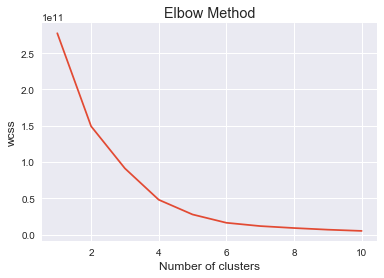

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(clicked)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
x = ['tot_spend', 'value']

In [ ]:
clicked.head()

In [ ]:
unknown.head()

In [ ]:
unknown.value.unique()

In [ ]:
clicked.value.unique()

In [ ]:
clicked[x].head()

In [ ]:
X = clicked[x]

In [ ]:
X = X.as_matrix(columns=None)

In [ ]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(clicked)

In [ ]:
y_means = kmeans.predict(clicked)

In [ ]:
plt.scatter(clicked, y_means, c=y_means, s=10, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers, y_means, c='green', s=300, alpha=0.7);